<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/%ED%95%84%EC%82%AC/Chap9_1~4_HW1110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH09. 추천 시스템

##9.1. 추천 시스템의 개요와 배경

###추천 시스템의 개요

* 추천 시스템 전성시대
* 아마존과 같은 전자상거래 업체, 유튜브, 애플 뮤직 등 콘텐츠 포탈 등은 추천 시스템을 통해 고객들이 자기 사이트에 오래 머무리게 하기 위해 노력함

###온라인 스토어의 필수 요소, 추천 시스템

* 온라인 스토어는 많은 양의 고객과 상품 관련 데이터를 가짐

[추천 시스템 구성에 사용될 수 있는 데이터]
* 사용자가 어떤 상품을 구매했는가?
* 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
* 사용자가 평가한 영화 평점은? 제품 평가는?
* 사용자가 스스로 작성한 자신의 취향은?
* 사용자가 무엇을 클릭했는가?

이와 같은 데이터를 기반으로 한 추천 시스템은 사용자가 상품을 구매하도록 유도함

###추천 시스템의 유형

* 콘텐츠 기반 필터링 방식
* 협업 필터링 방식 : 최근접 이웃 협업 필터링, 잠재 요인 협업 필터링


##9.2. 콘텐츠 기반 필터링 추천 시스템

* 콘텐츠 기반 필터링 방식: 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

* ex) 사용자가 특정 영화에 높은 평점을 줌 > 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등 유사한 다른 영화를 추천

###9.3. 최근접 이웃 협업 필터링

* 협업 필터링 방식: 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행하는 방식

* 주요 목표: 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것

* 최근접 이웃 방식과 잠재요인 방식으로 구분하며, 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행
사용자-아이템 평점 행렬에서 행은 개별 사용자, 열은 개별 아이템으로 구성

* 레코드 레벨 형태인 사용자-아이템 평점 데이터는 판다스의 pivot_table()과 같은 함수를 이용해 행렬 형태로 변환

* 이때, 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬 특성을 가지고 있음

[최근접 이웃 협업 필터링(메모리 협업 필터링)]

* 사용자 기반: "당신과 비슷한 고객들이 다음 상품도 구매했습니다." 특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식. 특정 사용자와 타 사용자 간의 유사도를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이템을 추천

* 아이템 기반: "이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다." 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘. 일반적으로는 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높음
비슷한 상품을 좋아한다고 해서 사람들의 취향이 비슷하다고 판단하기 어려운 경우가 많기 때문
* 따라서 코사인 유사도는 추천 시스템의 유사도 측정에 가장 많이 적용

##9.4. 잠재 요인 협업 필터링

### 잠재 요인 협업 필터링의 이해

* 잠재 요인 협업 필터링: 사용자-아이템 평점 매트릭스 속에 숨어있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
* 행렬 분해: 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출. 넷플릭스 경연 대회에서 사용되면서 유명해짐
* 잠재 요인이 무엇인지는 명확히 정의할 수 없음
* 잠재 요인을 기반으로 다차원 희소 행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재 요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬로 분해할 수 있으며, 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어서 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성하는 것

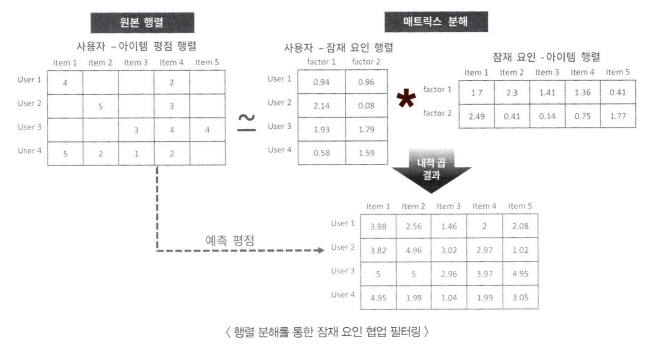

### 행렬 분해의 이해

행렬 분해: 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법

대표적으로 SVD, NMF등이 있음
M개의 사용자 행과 N개의 아이템 열을 가진 평점 행렬 R은 MxN 차원으로 구성되며, 행렬 분해를 통해서 사용자-K 차원 잠재 요인 행렬 P와 K 차원 잠재 요인-아이템 행렬 Q.T로 분해될 수 있음

즉, R = P*Q.T
M은 총 사용자 수
N은 총 아이템 수
K는 잠재 요인의 차원 수
R은 MxN 차원의 사용자-아이템 평점 행렬
P는 사용자와 잠재 요인과의 관계 값을 가지는 MxK 차원의 사용자-잠재요인 행렬
Q는 아이템과 잠재 요인과의 관계 값을 가지는 NxK 차원의 아이템-잠재 요인 행렬
Q.T는 Q 매트릭스의 행과 열 값을 교환한 전치 행렬
R 행렬의 u행 사용자와 i열 아이템 위치에 잇는 평점 데이터를
라고 하면

행렬 분해를 통해 얻어진 P 행렬과 Q.T 행렬의 내적을 통해 다시 계산 가능

행렬 분해는 주로 SVD 방식 이용
그러나 R 행렬에는 아직 평점이 되지 않은 많은 널 값이 있기 때문에 일반적인 SVD 방식으로는 분해할 수 없음 > 확률적 경사 하강법이나 ALS 방식 이용

### 확률적 경사 하강법을 이용한 행렬 분해

* P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것
1. P와 Q를 임의의 값을 가진 행렬로 설정합니다.
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류값을 계산합니다.
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트합니다.
4. 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화합니다.

[실제 값과 예측값의 오류 최소화와 L2 규제를 고려한 비용 함수식]

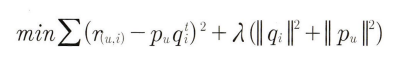

In [1]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3으로 설정
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
            [np.NaN, 5, np.NaN, 3, 1],
            [np.NaN, np.NaN, 3, 4, 4],
            [5,2,1,2,np.NaN]])
num_users, num_items = R.shape
K = 3

# P와 Q의 행렬 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [2]:
# 실제 R 행렬과 예측 행렬의 오차를 구하는 함수 생성
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스를 추출해 실제 R 행렬롸 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [3]:
# SGD 기반으로 행렬 분해 수행
# R > 0인 행과 열의 위치, 값을 non_zeros 리스트에 저장
non_zeros = [ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j]>0]
steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r-np.dot(P[i, :], Q[j, :].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i, :] = P[i, :]+learning_rate*(eij*Q[j, :]-r_lambda*P[i, :])
    Q[j, :] = Q[j, :]+learning_rate*(eij*P[i, :]-r_lambda*Q[j, :])
  rmse = get_rmse(R, P, Q, non_zeros)
  if (step%50) == 0:
    print('### iteration step : ', step, 'rmse : ', rmse)

### iteration step :  0 rmse :  3.2388050277987723
### iteration step :  50 rmse :  0.4876723101369648
### iteration step :  100 rmse :  0.1564340384819247
### iteration step :  150 rmse :  0.07455141311978046
### iteration step :  200 rmse :  0.04325226798579314
### iteration step :  250 rmse :  0.029248328780878973
### iteration step :  300 rmse :  0.022621116143829466
### iteration step :  350 rmse :  0.019493636196525135
### iteration step :  400 rmse :  0.018022719092132704
### iteration step :  450 rmse :  0.01731968595344266
### iteration step :  500 rmse :  0.016973657887570753
### iteration step :  550 rmse :  0.016796804595895633
### iteration step :  600 rmse :  0.01670132290188466
### iteration step :  650 rmse :  0.01664473691247669
### iteration step :  700 rmse :  0.016605910068210026
### iteration step :  750 rmse :  0.016574200475705
### iteration step :  800 rmse :  0.01654431582921597
### iteration step :  850 rmse :  0.01651375177473524
### iteration step :  900 rms

In [ ]:
# 분해된 p와 q함수를 p*Q.t로 예측 행렬을 만들어 출력
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

-> 원본 행렬과 비교해 널이 아닌 값은 큰 차이가 나지 않으며, 널인 값은 새로운 예측 값으로 채워짐